Exploratory Data Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') #to suppress warnings

In [3]:
#load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA/world_tourism_economy_data.csv')
insured=df.copy()

In [4]:
insured.head()

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,ABW,1999,7.820000e+08,9.720000e+05,62.542949,NaN,9.495387,1.722905e+09,2.280372,NaN
1,Africa Eastern and Southern,AFE,1999,8.034209e+09,1.530938e+07,12.204030,NaN,7.760536,2.654293e+11,7.819865,NaN
2,Afghanistan,AFG,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,1999,1.443613e+09,3.897975e+06,3.974476,NaN,6.147291,1.394683e+11,0.372266,NaN
4,Angola,AGO,1999,3.100000e+07,4.500000e+04,0.583858,NaN,2.489638,6.152923e+09,248.195902,NaN


In [5]:
insured.tail()

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
6645,Kosovo,XKX,2023,NaN,NaN,NaN,NaN,NaN,1.046822e+10,4.944324,NaN
6646,"Yemen, Rep.",YEM,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6647,South Africa,ZAF,2023,NaN,NaN,NaN,NaN,NaN,3.806993e+11,6.073909,32.098
6648,Zambia,ZMB,2023,NaN,NaN,NaN,NaN,NaN,2.757796e+10,10.884532,NaN
6649,Zimbabwe,ZWE,2023,NaN,NaN,NaN,NaN,NaN,3.523137e+10,NaN,9.348


In [6]:
insured.shape

(6650, 11)

In [7]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               6650 non-null   object 
 1   country_code          6650 non-null   object 
 2   year                  6650 non-null   int64  
 3   tourism_receipts      4289 non-null   float64
 4   tourism_arrivals      4949 non-null   float64
 5   tourism_exports       4114 non-null   float64
 6   tourism_departures    2589 non-null   float64
 7   tourism_expenditures  4173 non-null   float64
 8   gdp                   6424 non-null   float64
 9   inflation             5668 non-null   float64
 10  unemployment          3658 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 571.6+ KB


In [8]:
insured.describe()

,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
count,6650.000000,4.289000e+03,4.949000e+03,4114.000000,2.589000e+03,4173.000000,6.424000e+03,5668.000000,3658.000000
mean,2011.000000,3.062956e+10,6.263894e+07,15.506851,8.246093e+07,6.652740,2.089999e+12,6.319369,7.961191
std,7.211645,1.291076e+11,2.049444e+08,17.758374,2.064665e+08,4.071632,7.761985e+12,18.682769,5.802565
min,1999.000000,1.000000e+05,9.000000e+02,0.000956,2.000000e+03,0.157818,1.396473e+07,-16.859691,0.039000
25%,2005.000000,2.690000e+08,5.290000e+05,4.657732,1.051000e+06,4.074702,6.087182e+09,1.865425,4.250000
50%,2011.000000,1.553000e+09,2.508000e+06,8.306797,4.634000e+06,5.754790,3.681803e+10,3.629433,6.548000
75%,2017.000000,9.144227e+09,1.818000e+07,18.506710,4.508703e+07,7.985102,4.266977e+11,6.563197,9.894692
max,2023.000000,1.863069e+12,2.403074e+09,101.966999,2.034432e+09,28.192276,1.061717e+14,557.201817,57.000000


In [9]:
insured.isnull().sum()

,0
country,0
country_code,0
year,0
tourism_receipts,2361
tourism_arrivals,1701
tourism_exports,2536
tourism_departures,4061
tourism_expenditures,2477
gdp,226
inflation,982


In [10]:
null_percent= (insured.isnull().sum()/len(insured))*100
print(null_percent)

country                  0.000000
country_code             0.000000
year                     0.000000
tourism_receipts        35.503759
tourism_arrivals        25.578947
tourism_exports         38.135338
tourism_departures      61.067669
tourism_expenditures    37.248120
gdp                      3.398496
inflation               14.766917
unemployment            44.992481
dtype: float64


In [11]:
# dropping the ones with the null percent more than 50 and keeping the others in the dataset

#drop 'tourism departures' because the null percent is 60

insured.drop(columns=['tourism_departures'], inplace=True)

In [12]:
insured

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,ABW,1999,7.820000e+08,9.720000e+05,62.542949,9.495387,1.722905e+09,2.280372,NaN
1,Africa Eastern and Southern,AFE,1999,8.034209e+09,1.530938e+07,12.204030,7.760536,2.654293e+11,7.819865,NaN
2,Afghanistan,AFG,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,1999,1.443613e+09,3.897975e+06,3.974476,6.147291,1.394683e+11,0.372266,NaN
4,Angola,AGO,1999,3.100000e+07,4.500000e+04,0.583858,2.489638,6.152923e+09,248.195902,NaN
...,...,...,...,...,...,...,...,...,...,...
6645,Kosovo,XKX,2023,NaN,NaN,NaN,NaN,1.046822e+10,4.944324,NaN
6646,"Yemen, Rep.",YEM,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6647,South Africa,ZAF,2023,NaN,NaN,NaN,NaN,3.806993e+11,6.073909,32.098
6648,Zambia,ZMB,2023,NaN,NaN,NaN,NaN,2.757796e+10,10.884532,NaN


In [13]:
# using fillna to fill the NaN values with means and median
#means for the data that is less skewed and median for the ones that is more skewed

insured['gdp'].fillna(insured['gdp'].mean(), inplace=True)
insured['inflation'].fillna(insured['inflation'].mean(), inplace=True)
insured['unemployment'].fillna(insured['unemployment'].mean(), inplace=True)

for col in ['tourism_receipts', 'tourism_arrivals', 'tourism_exports', 'tourism_expenditures']:
  insured[col].fillna(insured[col].median(), inplace=True)

In [14]:
insured

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,ABW,1999,7.820000e+08,9.720000e+05,62.542949,9.495387,1.722905e+09,2.280372,7.961191
1,Africa Eastern and Southern,AFE,1999,8.034209e+09,1.530938e+07,12.204030,7.760536,2.654293e+11,7.819865,7.961191
2,Afghanistan,AFG,1999,1.553000e+09,2.508000e+06,8.306797,5.754790,2.089999e+12,6.319369,7.961191
3,Africa Western and Central,AFW,1999,1.443613e+09,3.897975e+06,3.974476,6.147291,1.394683e+11,0.372266,7.961191
4,Angola,AGO,1999,3.100000e+07,4.500000e+04,0.583858,2.489638,6.152923e+09,248.195902,7.961191
...,...,...,...,...,...,...,...,...,...,...
6645,Kosovo,XKX,2023,1.553000e+09,2.508000e+06,8.306797,5.754790,1.046822e+10,4.944324,7.961191
6646,"Yemen, Rep.",YEM,2023,1.553000e+09,2.508000e+06,8.306797,5.754790,2.089999e+12,6.319369,7.961191
6647,South Africa,ZAF,2023,1.553000e+09,2.508000e+06,8.306797,5.754790,3.806993e+11,6.073909,32.098000
6648,Zambia,ZMB,2023,1.553000e+09,2.508000e+06,8.306797,5.754790,2.757796e+10,10.884532,7.961191


In [15]:
insured.isnull().sum()

,0
country,0
country_code,0
year,0
tourism_receipts,0
tourism_arrivals,0
tourism_exports,0
tourism_expenditures,0
gdp,0
inflation,0
unemployment,0


In [16]:
insured.shape

(6650, 10)

In [17]:
df.shape

(6650, 11)

In [18]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               6650 non-null   object 
 1   country_code          6650 non-null   object 
 2   year                  6650 non-null   int64  
 3   tourism_receipts      6650 non-null   float64
 4   tourism_arrivals      6650 non-null   float64
 5   tourism_exports       6650 non-null   float64
 6   tourism_expenditures  6650 non-null   float64
 7   gdp                   6650 non-null   float64
 8   inflation             6650 non-null   float64
 9   unemployment          6650 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 519.7+ KB


In [19]:
insured['country']= insured['country'].astype('category')
insured['country_code']=insured['country_code'].astype('category')

In [20]:
insured.describe()

,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_expenditures,gdp,inflation,unemployment
count,6650.000000,6.650000e+03,6.650000e+03,6650.000000,6650.000000,6.650000e+03,6650.000000,6650.000000
mean,2011.000000,2.030629e+10,4.725808e+07,12.761086,6.318270,2.089999e+12,6.319369,7.961191
std,7.211645,1.046110e+11,1.787324e+08,14.398281,3.254334,7.628930e+12,17.248038,4.303327
min,1999.000000,1.000000e+05,9.000000e+02,0.000956,0.157818,1.396473e+07,-16.859691,0.039000
25%,2005.000000,7.065000e+08,9.470000e+05,6.851134,5.219782,6.393256e+09,2.178540,6.133250
50%,2011.000000,1.553000e+09,2.508000e+06,8.306797,5.754790,4.341330e+10,4.378760,7.961191
75%,2017.000000,3.352325e+09,7.689250e+06,10.677279,6.415105,5.574183e+11,6.319369,7.961191
max,2023.000000,1.863069e+12,2.403074e+09,101.966999,28.192276,1.061717e+14,557.201817,57.000000


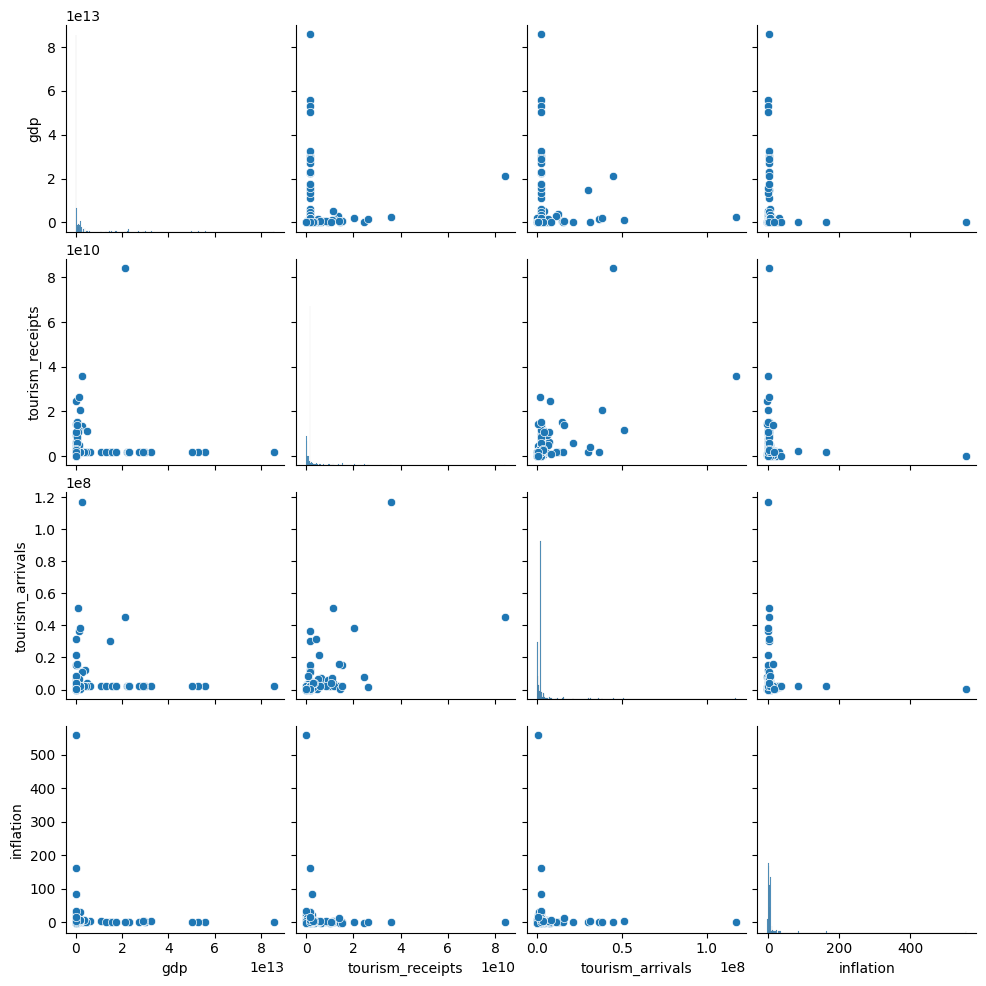

In [21]:
insured_2020= insured[insured['year']==2020] ## for a bit clearer visualization
sns.pairplot(insured_2020[['gdp', 'tourism_receipts', 'tourism_arrivals', 'inflation']])

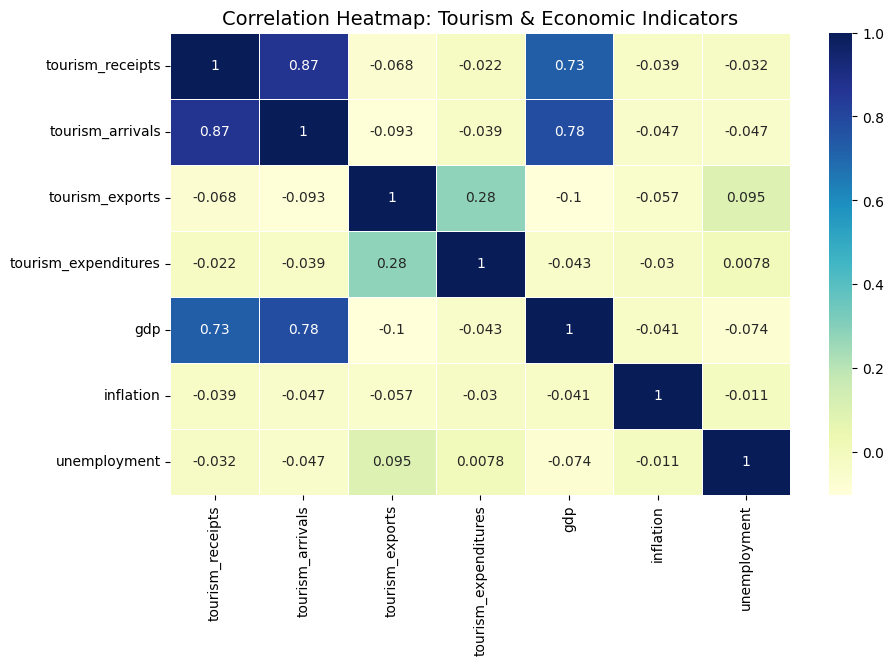

In [22]:
tourism_cols = [
    'tourism_receipts',
    'tourism_arrivals',
    'tourism_exports',
    'tourism_expenditures',
    'gdp',
    'inflation',
    'unemployment'
]

# Creating correlation heatmap to show which variables correlate the most
plt.figure(figsize=(10, 6))
sns.heatmap(insured[tourism_cols].corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Correlation Heatmap: Tourism & Economic Indicators", fontsize=14)
plt.show()

In [23]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   country               6650 non-null   category
 1   country_code          6650 non-null   category
 2   year                  6650 non-null   int64   
 3   tourism_receipts      6650 non-null   float64 
 4   tourism_arrivals      6650 non-null   float64 
 5   tourism_exports       6650 non-null   float64 
 6   tourism_expenditures  6650 non-null   float64 
 7   gdp                   6650 non-null   float64 
 8   inflation             6650 non-null   float64 
 9   unemployment          6650 non-null   float64 
dtypes: category(2), float64(7), int64(1)
memory usage: 462.1 KB


In [24]:
insured_new= insured[['country', 'country_code', 'year', 'tourism_receipts', 'tourism_arrivals', 'gdp']] #keeping the only with strong correlation
insured_new

,country,country_code,year,tourism_receipts,tourism_arrivals,gdp
0,Aruba,ABW,1999,7.820000e+08,9.720000e+05,1.722905e+09
1,Africa Eastern and Southern,AFE,1999,8.034209e+09,1.530938e+07,2.654293e+11
2,Afghanistan,AFG,1999,1.553000e+09,2.508000e+06,2.089999e+12
3,Africa Western and Central,AFW,1999,1.443613e+09,3.897975e+06,1.394683e+11
4,Angola,AGO,1999,3.100000e+07,4.500000e+04,6.152923e+09
...,...,...,...,...,...,...
6645,Kosovo,XKX,2023,1.553000e+09,2.508000e+06,1.046822e+10
6646,"Yemen, Rep.",YEM,2023,1.553000e+09,2.508000e+06,2.089999e+12
6647,South Africa,ZAF,2023,1.553000e+09,2.508000e+06,3.806993e+11
6648,Zambia,ZMB,2023,1.553000e+09,2.508000e+06,2.757796e+10


<Axes: xlabel='year'>

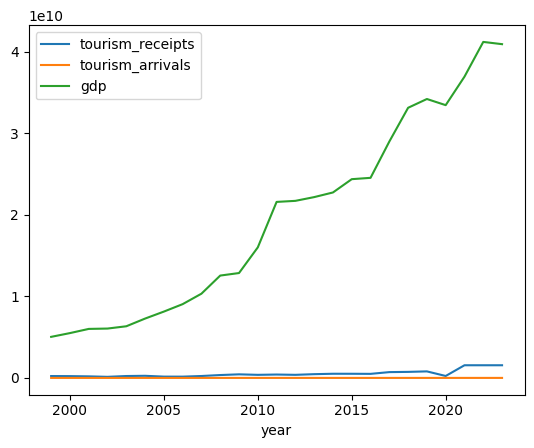

In [25]:
insured_new[insured_new['country']=='Nepal'].plot(x='year', y=['tourism_receipts', 'tourism_arrivals', 'gdp'], kind='line') #time series plot which shows change in variable over time

In [26]:
insured_new.groupby('year')[['tourism_receipts', 'tourism_arrivals', 'gdp']].mean().corr()#correlation over time

,tourism_receipts,tourism_arrivals,gdp
tourism_receipts,1.000000,0.968073,0.054677
tourism_arrivals,0.968073,1.000000,-0.184797
gdp,0.054677,-0.184797,1.000000


In [27]:
insured_new

,country,country_code,year,tourism_receipts,tourism_arrivals,gdp
0,Aruba,ABW,1999,7.820000e+08,9.720000e+05,1.722905e+09
1,Africa Eastern and Southern,AFE,1999,8.034209e+09,1.530938e+07,2.654293e+11
2,Afghanistan,AFG,1999,1.553000e+09,2.508000e+06,2.089999e+12
3,Africa Western and Central,AFW,1999,1.443613e+09,3.897975e+06,1.394683e+11
4,Angola,AGO,1999,3.100000e+07,4.500000e+04,6.152923e+09
...,...,...,...,...,...,...
6645,Kosovo,XKX,2023,1.553000e+09,2.508000e+06,1.046822e+10
6646,"Yemen, Rep.",YEM,2023,1.553000e+09,2.508000e+06,2.089999e+12
6647,South Africa,ZAF,2023,1.553000e+09,2.508000e+06,3.806993e+11
6648,Zambia,ZMB,2023,1.553000e+09,2.508000e+06,2.757796e+10


<Axes: xlabel='year', ylabel='tourism_receipts'>

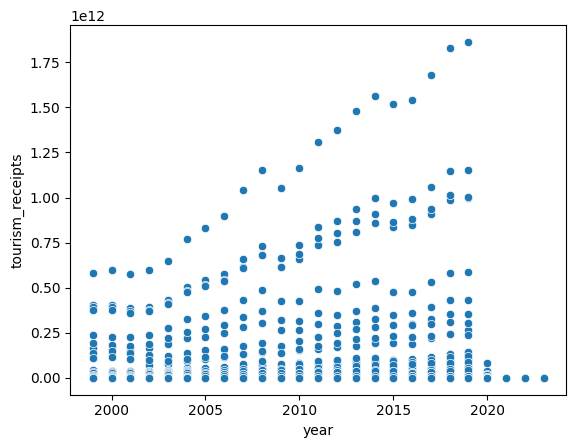

In [28]:
sns.scatterplot(x='year', y= 'tourism_receipts', data= insured_new)

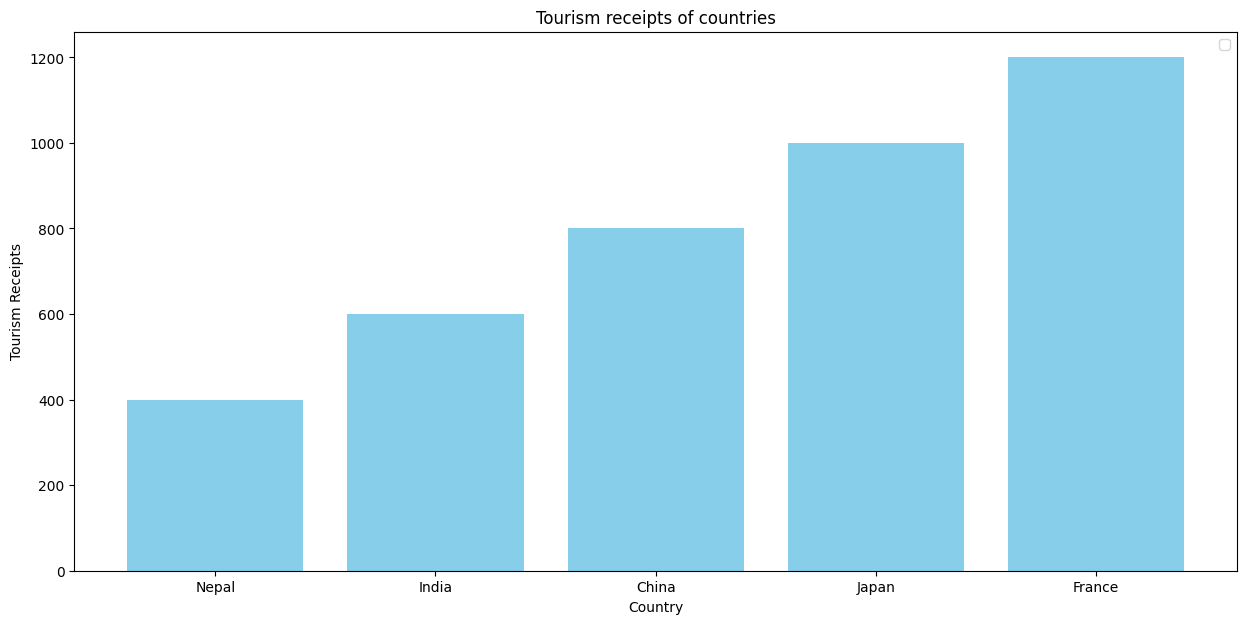

In [29]:
data= {
    'country':['Nepal', 'India', 'China', 'Japan', 'France'],
    'tourism_receipts': [400, 600, 800, 1000, 1200]
}

bar= pd.DataFrame(data)

# creating a bar chart

plt.figure(figsize=(15,7))
plt.bar(bar['country'], bar['tourism_receipts'], color='skyblue')
plt.title('Tourism receipts of countries')
plt.legend()
plt.xlabel('Country')
plt.ylabel('Tourism Receipts')
plt.show()

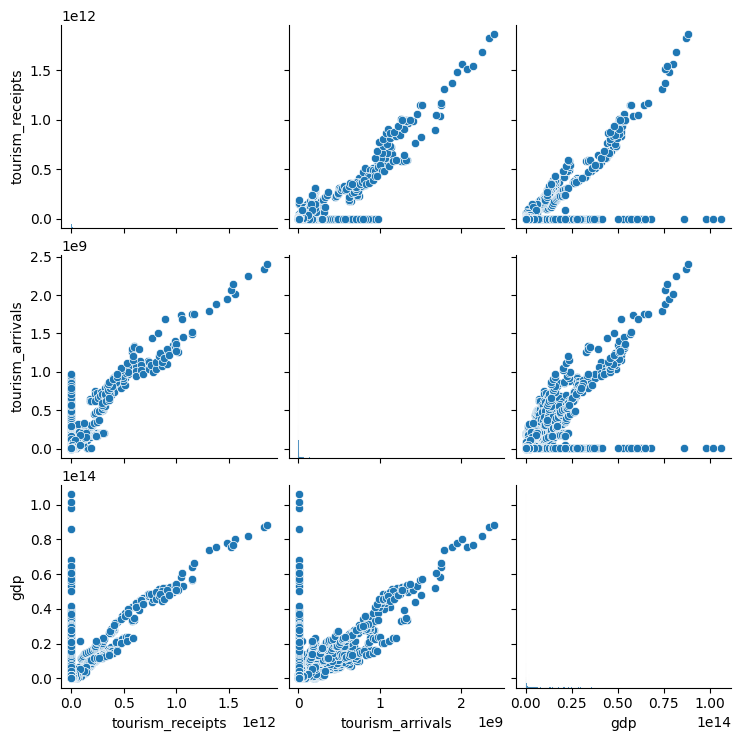

In [30]:
sns.pairplot(insured_new[['tourism_receipts', 'tourism_arrivals', 'gdp']])

Hypothesis Testing using Linear Regression

Topic on hypothesis:

H₀ (Null Hypothesis): There is no significant relationship between tourism receipts or tourism arrivals and GDP.

H₁ (Alternative Hypothesis): Higher tourism receipts and tourism arrivals significantly increase GDP.

In [31]:
insured_new

,country,country_code,year,tourism_receipts,tourism_arrivals,gdp
0,Aruba,ABW,1999,7.820000e+08,9.720000e+05,1.722905e+09
1,Africa Eastern and Southern,AFE,1999,8.034209e+09,1.530938e+07,2.654293e+11
2,Afghanistan,AFG,1999,1.553000e+09,2.508000e+06,2.089999e+12
3,Africa Western and Central,AFW,1999,1.443613e+09,3.897975e+06,1.394683e+11
4,Angola,AGO,1999,3.100000e+07,4.500000e+04,6.152923e+09
...,...,...,...,...,...,...
6645,Kosovo,XKX,2023,1.553000e+09,2.508000e+06,1.046822e+10
6646,"Yemen, Rep.",YEM,2023,1.553000e+09,2.508000e+06,2.089999e+12
6647,South Africa,ZAF,2023,1.553000e+09,2.508000e+06,3.806993e+11
6648,Zambia,ZMB,2023,1.553000e+09,2.508000e+06,2.757796e+10


In [32]:
import statsmodels.api as sm


In [33]:
X= insured_new[['tourism_receipts', 'tourism_arrivals']] #independent variables
Y= insured_new[['gdp']] #dependent variables

X=sm.add_constant(X)

In [34]:
#fitting the model using ordinary least squares

model=sm.OLS(Y,X).fit()

#getting the summary of regression analysis
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     5334.
Date:                Wed, 09 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:25:07   Log-Likelihood:            -2.0351e+05
No. Observations:                6650   AIC:                         4.070e+05
Df Residuals:                    6647   BIC:                         4.070e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.784e+11   6.01e+10  